<a href="https://colab.research.google.com/github/vasamsettiTejasree/sentimental-Analysis-AI-ML-for-MICRO-IT/blob/main/sentimental_analysis_project_for_micro_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:

# 1. Load Dataset (Using a sample dataset)
print("\nLoading dataset...")
df = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
df = df[['label', 'tweet']]
df.columns = ['Sentiment', 'Text']
df['Sentiment'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
print("Dataset loaded. Sample:")
print(df.head())



Loading dataset...
Dataset loaded. Sample:
  Sentiment                                               Text
0  Negative   @user when a father is dysfunctional and is s...
1  Negative  @user @user thanks for #lyft credit i can't us...
2  Negative                                bihday your majesty
3  Negative  #model   i love u take with u all the time in ...
4  Negative             factsguide: society now    #motivation


In [5]:
# 2. Data Preprocessing
print("\nPreprocessing text data...")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Clean_Text'] = df['Text'].apply(clean_text)


Preprocessing text data...



Visualizing sentiment distribution...


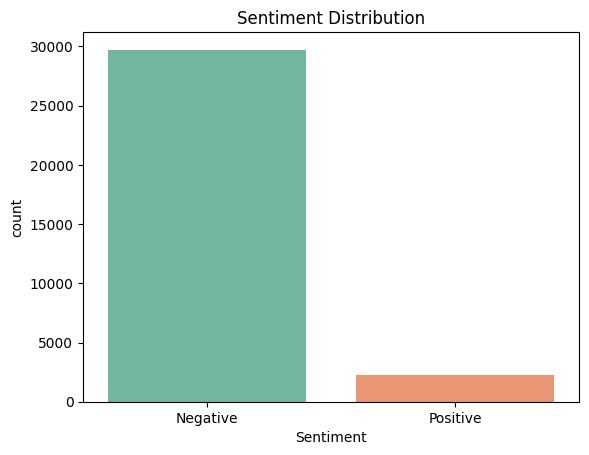

In [6]:
# 3. Visualize Sentiment Distribution
print("\nVisualizing sentiment distribution...")
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


In [7]:
# 4. Split Data
print("\nSplitting data into train and test sets...")
X = df['Clean_Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Splitting data into train and test sets...
Training samples: 25569, Testing samples: 6393


In [8]:
# 5. Feature Extraction
print("\nExtracting features using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



Extracting features using TF-IDF...


In [9]:

# 6. Train Model
print("\nTraining Naive Bayes model...")
model = MultinomialNB()
model.fit(X_train_vec, y_train)



Training Naive Bayes model...


MultinomialNB()

In [10]:
# 7. Evaluate Model
print("\nEvaluating model...")
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Evaluating model...
Accuracy: 95.18 %

Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5945
    Positive       0.89      0.36      0.51       448

    accuracy                           0.95      6393
   macro avg       0.92      0.68      0.74      6393
weighted avg       0.95      0.95      0.94      6393




Displaying confusion matrix...


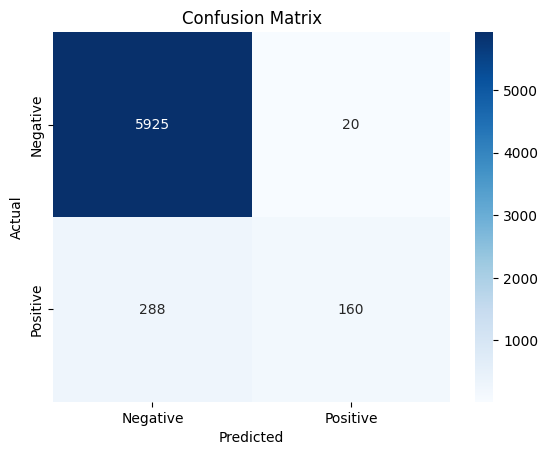

In [11]:
# 8. Confusion Matrix
print("\nDisplaying confusion matrix...")
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# 9. Predict New Text
def predict_sentiment(text):
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    prediction = model.predict(vec)[0]
    return prediction

print("\nSample Prediction:")
sample_text = "I absolutely love the features of this app!"
print(f"Input: {sample_text}")
print("Predicted Sentiment:", predict_sentiment(sample_text))


Sample Prediction:
Input: I absolutely love the features of this app!
Predicted Sentiment: Negative
